# Shashank Sadafule 
#### Department of Physics, Indian Institute of Technology Kharagpur
***


# Self Project: Black Friday Sales Prediction
***
Black Friday is a colloquial term for Friday after Thanksgiving in United States. During this time, many stores offer highly promoted sales at discounted prices, hence it is traditionally marked as the start of Christmas shopping season. 


Specifically on this day, a retail company wants to **understand the customer purchase behaviour (specifically, purchase amount)** against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (Age, Gender, Marital Status, City_Category, Stay_In_Current_City), product details (Product_ID and Product_Category) and total Purchase_amount from last month.

After analyzing the dataset, we are going to build a model to predict the purchase amount of customer which will help the company to create personalized offer for customers against different products.


## Dataset introduction
***

The description of each feature in the dataset is given below :-

|Feature Name|Description|
|---|---|
|User_ID|Identity Number  of a User|
|Product_ID|Identity Number of a Product|
|Gender|Gender of User (M/F)|
|Age|Age of the User (in bins)|
|Occupation|Occupation Number|
|City_Category|City of a User|
|Stay_In_Current_City_Years|Number of Years the User has Stayed in their City|
|Marital Status|0 if Unmarried and 1 if Married|
|Product_Category_1|Masked Product Category|
|Product_Category_2|Masked Other Product Category|
|Product_Category_3|Masked Other Product Category|
|Purchase|Purchase Amount (Target Variable)|


## Content
***

1) Dataset Analysis<br>
2) Univariate Analysis of Target Variable  <br>
3) Bivariate Analysis  <br>
4) Preprocessing <br>
5) Model Selection


## Dataset Analysis
***

#### Importing Libraries

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Load

In [3]:
#training dataset
df = pd.read_csv("train.csv")

#testing dataset
test_df = pd.read_csv("test.csv")

#### Display

In [4]:
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
347851,1005575,P00182142,M,36-45,7,C,2,0,1,5.0,6.0,15435
290163,1002753,P00116242,F,51-55,20,B,1,1,8,15.0,NaN,8029
491925,1003768,P00120642,M,26-35,4,B,2,0,5,NaN,NaN,5374
317305,1000939,P00209742,F,26-35,20,C,2,0,1,11.0,15.0,11417
161036,1000922,P00293342,M,55+,16,B,2,1,8,NaN,NaN,7987


#### Shape

In [7]:
df.shape

(550068, 12)

There are more than almost 0.5 MILLION rows in the training set

#### Some Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### Duplicate Data

In [9]:
df.duplicated().value_counts()

False    550068
dtype: int64

There is NO duplicate data in the dataframe

#### Missing Values

In [10]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

There are significant number of missing values in feature Product_Category_2 and Product_Category_3 <br>

We could do the following :-

1) Replace those missing values with the most frequently occuring category number.<br>
2) Replace it with the value that would have no effect while training the model.

### Statistics of numerical features

In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Mean of marital status is ~0.4 meaning majority of users are unmarried.<br>
 

### Statistics of categorical features


In [12]:
df.describe(include=['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


1) Significant number of users are male, ~80% <br>
2) Significant number of users are between age 25-35, ~40%<br>
3) Majority of users live in City_Category B, ~45%<br>

### Correlation

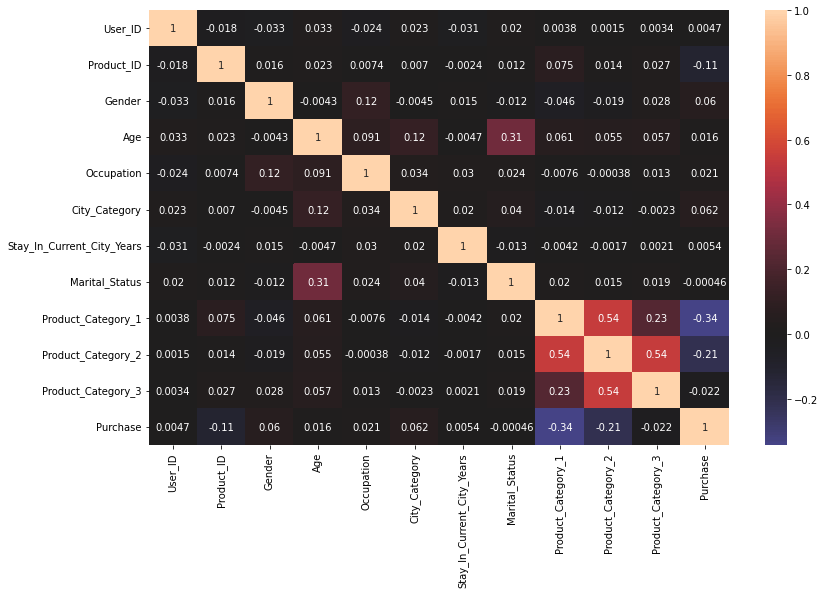

In [14]:
num_df = df.copy()

col = ['Product_ID','Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for i in col:
    num_df[i] = num_df[i].astype('category').cat.codes


corr = num_df.corr(method='pearson')

plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True,center=0)


1) Marital_Status and Age are **highly correlated**<br>
2) Marital Status,User_ID and Stay_In_ Current_City_Years are **highly uncorrelated** with Purchase,maybe we could remove these features<br>
3) Product_ID and Purchase are coorelated!<br>

## Univariate Analysis of Target Variable
***

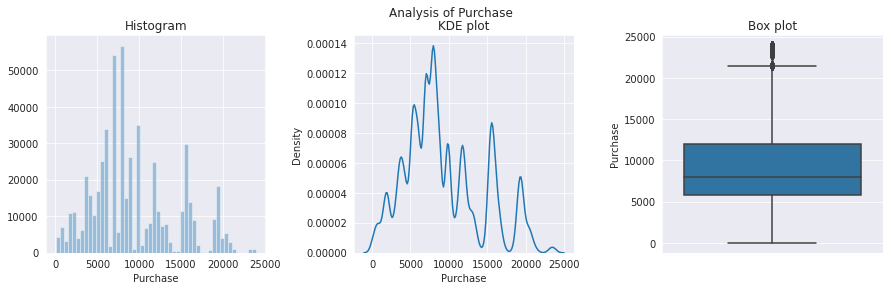

Skewness:  0.6001400037087128
Kurtosis:  -0.3383775655851702


In [41]:
#make subplots
fig,axes = plt.subplots(1,3,figsize=(15,4))
fig.suptitle('Analysis of Purchase')
plt.subplots_adjust(wspace=0.4,hspace=0.4)
sns.set_style('darkgrid')
   
#histogram
sns.distplot(df['Purchase'],kde=False,ax = axes[0])
axes[0].set_title('Histogram')
#color='b'

#kdeplot
sns.kdeplot(data=df['Purchase'],ax = axes[1])
axes[1].set_title('KDE plot')

#boxplot
sns.boxplot(y=df['Purchase'],ax=axes[2])
axes[2].set_title('Box plot')

plt.show()

print('Skewness: ',df['Purchase'].skew())
print('Kurtosis: ',df['Purchase'].kurt())

1) Skewness is positive means that the tail of distribution is towards right as we can see in the histogram<br>
2) There are many outliers that we must remove as seen in the boxplot.<br>

## Bivariate Analysis
***

#### Function #1 to plot necessary graphs

In [16]:
def Plot_1(feature): 
    
    fig,axes = plt.subplots(2,2,figsize=(15,12))
    fig.suptitle('Analysis of Purchase with ' + feature)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    sns.set_style('darkgrid')

    
    for i in df[feature].unique():
        
        #histogram
        sns.distplot(a=df.loc[df[feature]==i]['Purchase'],ax = axes[0][0],label=i, kde=False)
        
        #kde_plot
        sns.kdeplot(data=df.loc[df[feature]==i]['Purchase'],ax = axes[0][1],label=i)
                
        
    axes[0][0].set_title('Histogram')
    axes[0][1].set_title('KDE plot')
    
    #piechart
    temp_df = df.groupby([feature]).sum().reset_index().sort_values('Purchase',ascending=False)
    colors = sns.color_palette('pastel')
    axes[1][0].pie(temp_df['Purchase'], labels = temp_df[feature], colors = colors, autopct='%.0f%%')
    axes[1][0].set_title('Percentage of Purchases by ' + feature)


    #boxplot
    sns.boxplot(y=df['Purchase'],x=df[feature],ax=axes[1][1])
    axes[1][1].set_title('Box plot of Purchase by '+  feature)

    plt.legend()

### Gender 

#### Total Counts

In [116]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

#### Mean

In [117]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

No handles with labels found to put in legend.


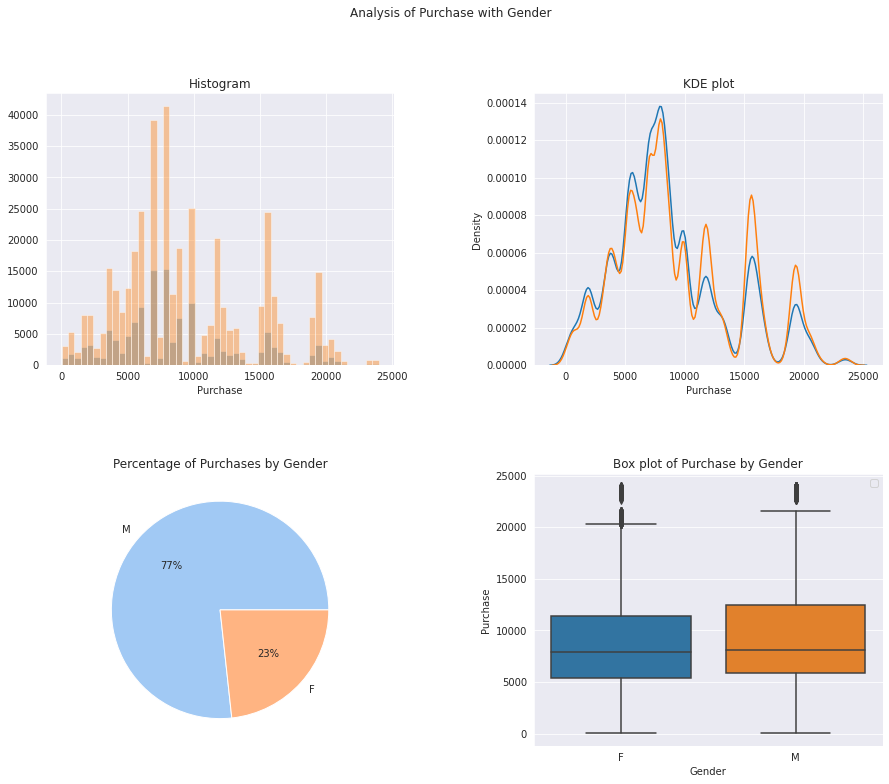

In [42]:
Plot_1('Gender')

1) Average male purchase is higher than that of female<br>
2) ~75% of users are male<br>
3) The purchase density of Male and Female is almost overlapping<br>

### Marital Status

#### Total Count

In [20]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

#### Mean

In [21]:
df.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

No handles with labels found to put in legend.


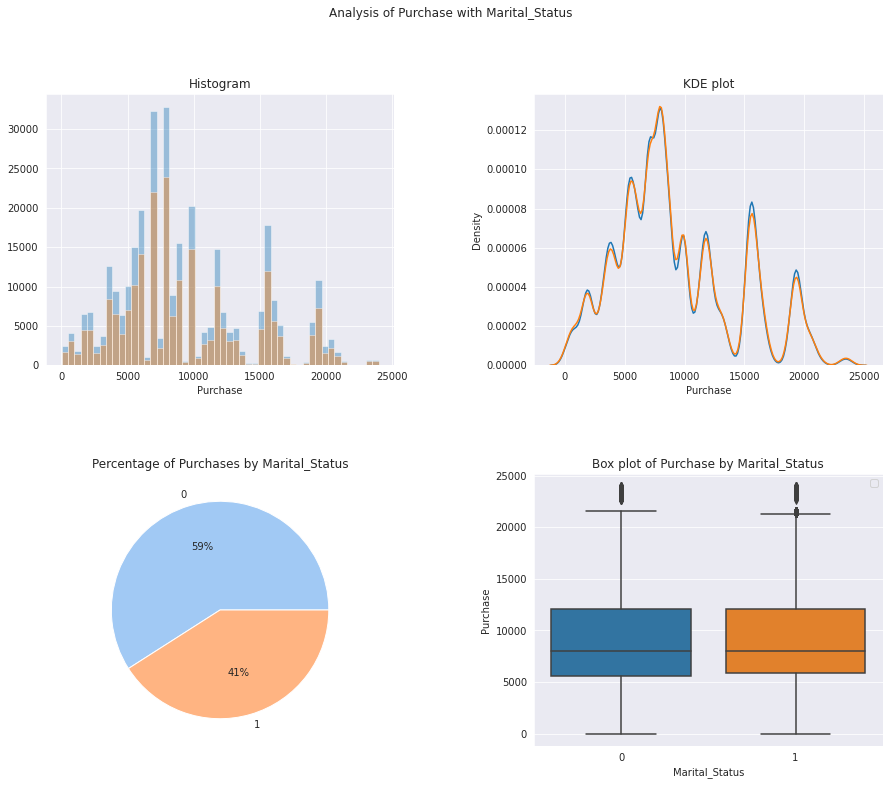

In [43]:
Plot_1('Marital_Status')

The mean and meadian for both values for this feature is almost same and there is little to no correlation between it and purchase.<br> **We can discard this feature in preprocessing!**

### City

#### Total Counts

In [23]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

#### Mean

In [17]:
df.groupby('City_Category')['Purchase'].mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

No handles with labels found to put in legend.


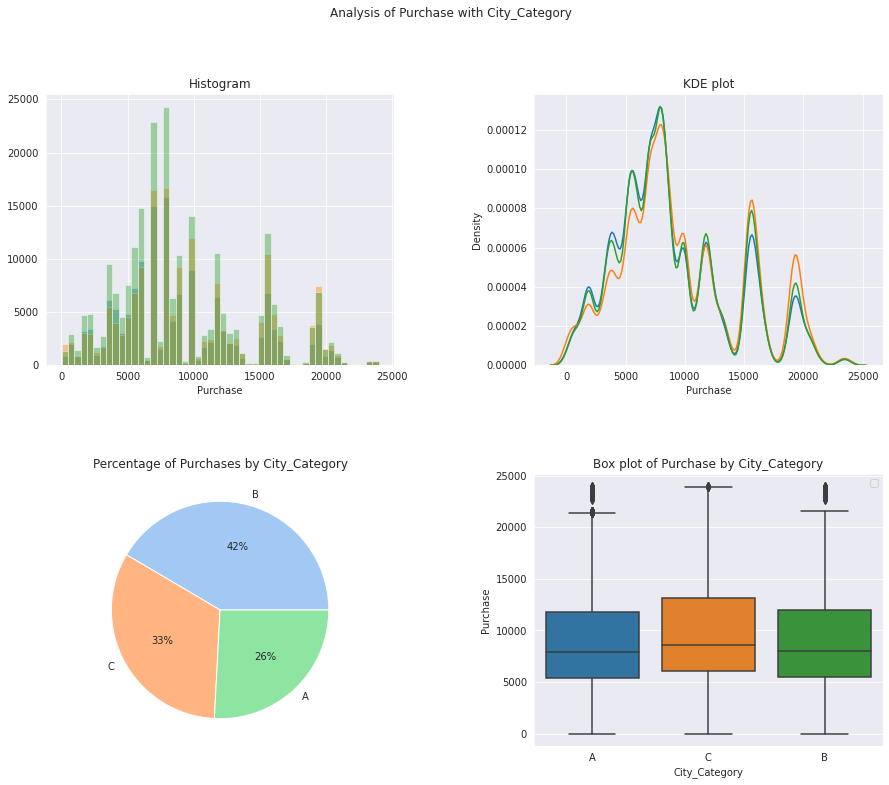

In [44]:
Plot_1('City_Category')

1) Mean purchase is different for each category <br>
2) The  city wise distribution is almost the same as seen in piechart

#### Function #2 to plot some necessary graphs

In [22]:
def Plot_2(feature):

    fig,axes = plt.subplots(2,2,figsize=(15,12))
    fig.suptitle('Analysis of Purchase with ' + feature)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    sns.set_style('darkgrid')


    #sns.barplot
    sns.barplot(x=feature,y='Purchase',data=df.groupby([feature]).sum().reset_index().sort_values(feature),palette='plasma',ax=axes[0][0])
    axes[0][0].set_title('Barplot - Sum')

    sns.barplot(x=feature,y='Purchase',data=df.groupby([feature]).mean().reset_index().sort_values(feature),palette='plasma',ax=axes[0][1])
    axes[0][1].set_title('Barplot - Mean')

    #sns.boxplot
    sns.boxplot(y=df['Purchase'],x=df[feature],ax=axes[1][1])
    axes[1][1].set_title('Boxplot')


    #plt.pie chart!
    temp_df = df.groupby([feature]).sum().reset_index().sort_values(feature,ascending=False)
    colors = sns.color_palette('pastel')#[0:7]
    axes[1][0].pie(temp_df['Purchase'], labels = temp_df[feature], colors = colors, autopct='%.0f%%' ,pctdistance=0.8)
    axes[1][0].set_title('Percentage of Purchases by ' + feature)


### Age

#### Total Counts

In [23]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

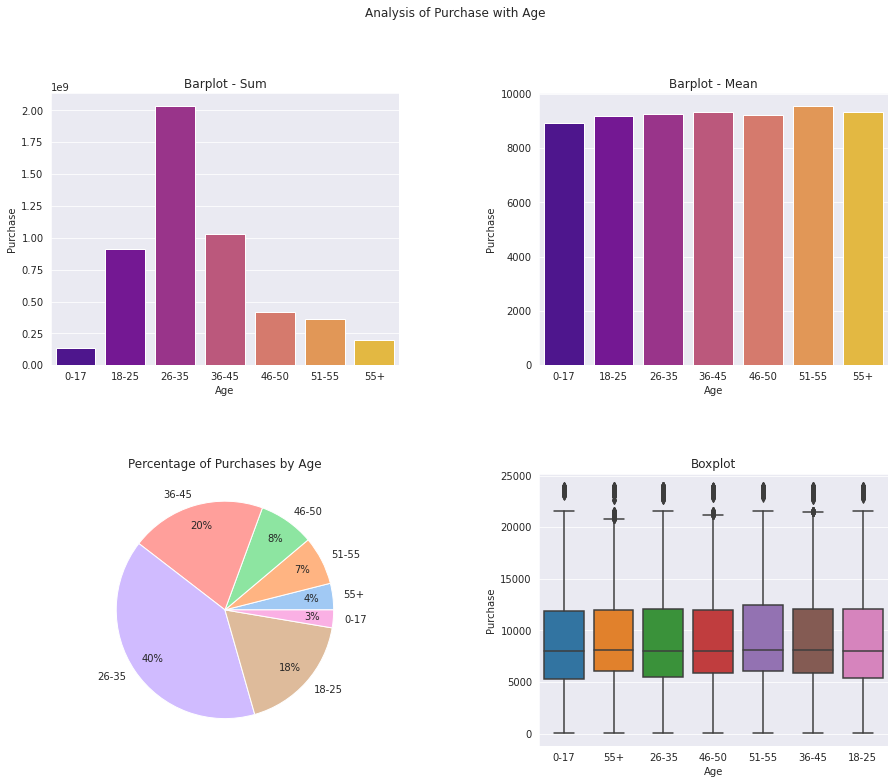

In [24]:
Plot_2('Age')

1) Mean of average purchase across all age groups is almost the same. <br>
2) 40% of total purchases are made by 26-35 age group, this is because there are more number of users in this category!

### Occupation

#### Total Counts

In [25]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

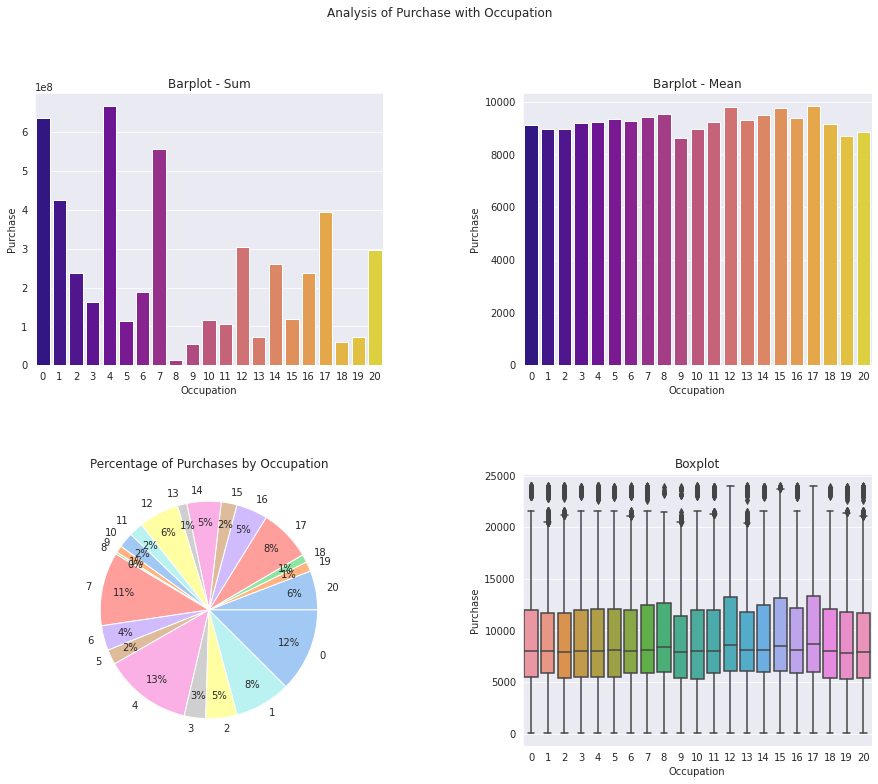

In [26]:
Plot_2('Occupation')

1) The mean of all values is almost the same. Despite that, the total purchases are very different because of different number of occurances in the dataset.<br>
2) The distribution across different occupations is also the same as seen in boxplot 

### Stay in Current City

#### Total counts

In [30]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

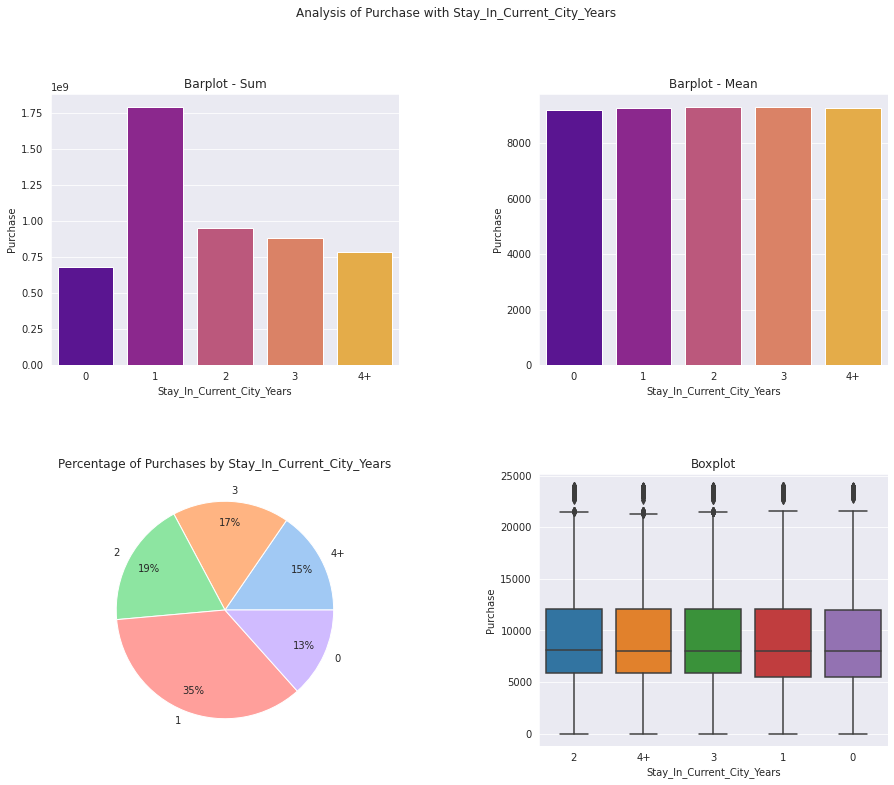

In [27]:
Plot_2('Stay_In_Current_City_Years')

There is no variation in mean or median of purchase for this feature, also its correlation is very less.<br>
**We can discard this feature!**

### Product Category 1

#### Total Counts

In [32]:
df['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

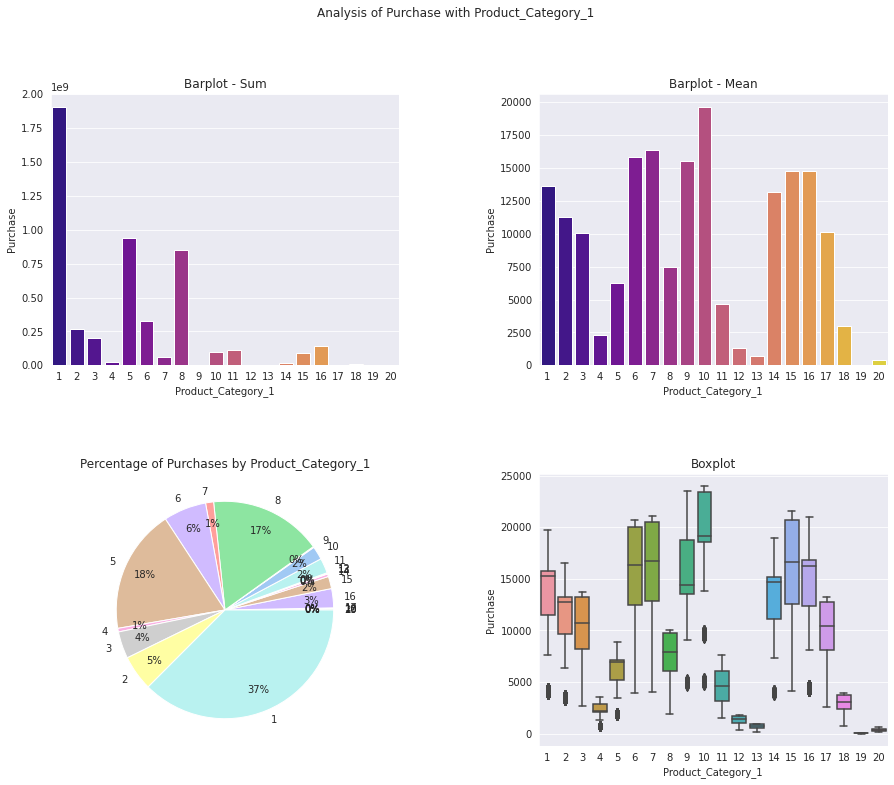

In [28]:
Plot_2('Product_Category_1')

1) From Barplot - Sum, we can see that product #1 has the most purchases. <br>
2) Product #19 , #20 and #13 has almost no purchases, we can see that from all the plots above. <br>
3) Product category #10 has the highest mean, but it accounts for the small fraction of total sum of purchases.

**There is a alot of variation in Purchase Mean for each value in this feature**

### Product Category 2

#### Total Counts

In [35]:
df['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

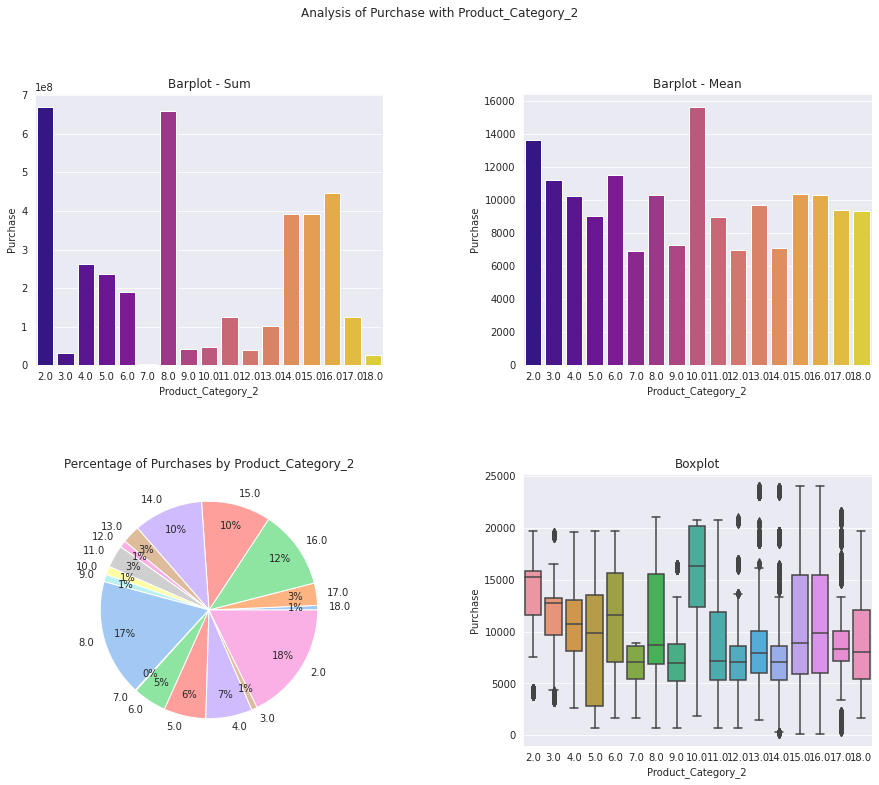

In [29]:
Plot_2('Product_Category_2')

1) There is no #1 in Product Category 2 as expected<br>
2) #2 and #8 have highest total purchases <br>
3) #10 has highest mean <br>
4) There are many outliers as seen in the boxplots.<br>
5) The purchase means of each value in this category are different

### Product Category 3

#### Total counts

In [37]:
df['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

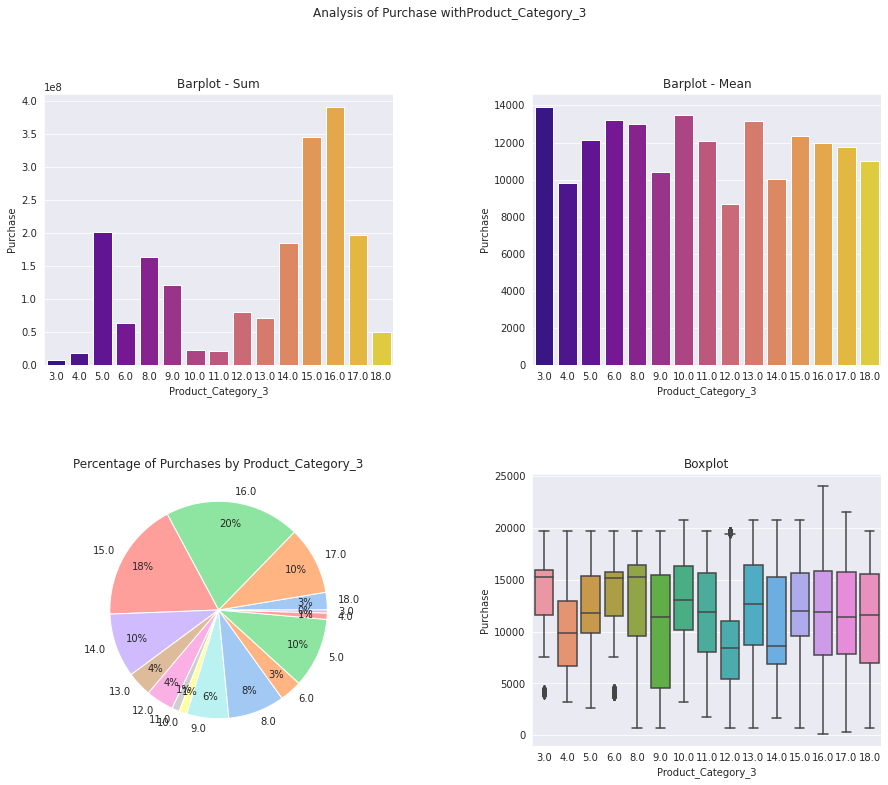

In [38]:
Plot_2('Product_Category_3')

1) #16 has highest total purchases. <br>
2) The mean of all the products are almost similar.<br>
3) #14, #15. #16, #17 account for more than 50% of the total purchases.<br>

### Swarmplot for Product Category

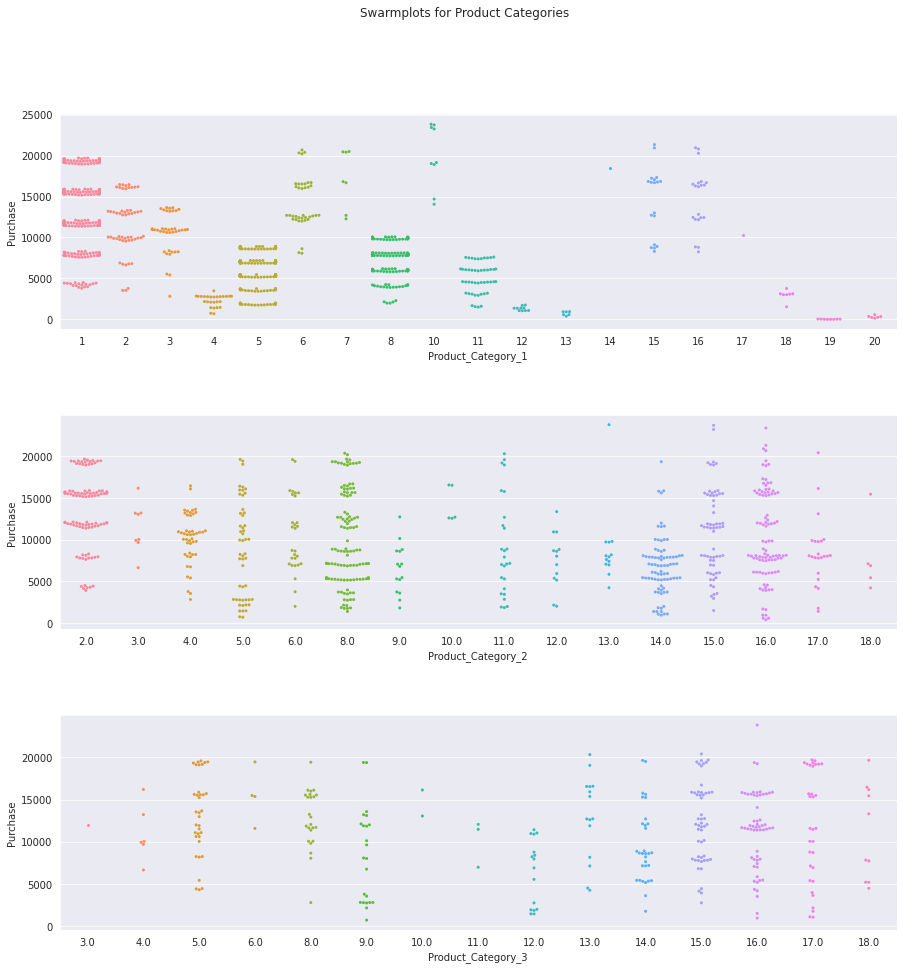

In [45]:
fig,axes = plt.subplots(3,1,figsize=(15,15))
fig.suptitle('Swarmplots for Product Categories')
plt.subplots_adjust(wspace=0.4,hspace=0.4)

sns.set_style('darkgrid')

sub_df = df.sample(1000)

sns.swarmplot(data=sub_df,x='Product_Category_1', y = 'Purchase',size=3, ax=axes[0])

sns.swarmplot(data=sub_df,x='Product_Category_2', y = 'Purchase',size=3,ax=axes[1])

sns.swarmplot(data=sub_df,x='Product_Category_3', y = 'Purchase',size=3,ax=axes[2])

We can see that the the value for purchase seems very **descrete** for each value every Product_Category!

## Pre-processing
***

#### Removing Outliers from Training data set

In [33]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1    
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [34]:
df_clean = remove_outlier(df,'Purchase')

df_clean.reset_index(drop=True)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
547386,1006033,00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
547387,1006035,00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
547388,1006036,00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
547389,1006038,00375436,F,55+,1,C,2,0,20,NaN,NaN,365


#### Feature Engineering

In [37]:
#gender
df_features = pd.get_dummies(df_clean['Gender'], prefix = 'Gender_')

#age
df_features['Age_Group'] = df_clean['Age'].map({'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})

#city
city = pd.get_dummies(df_clean['City_Category'])
df_features=df_features.assign(City_A = city['A'],City_B = city['B'],City_C = city['C'])


In [39]:
#Product Category

pc1 = pd.get_dummies(df_clean['Product_Category_1'])


pc2 = pd.get_dummies(df_clean['Product_Category_2'])
#add extra columns to match Product_Category_1
pc2.insert(loc=0, column=1, value=0)
pc2[19] = 0
pc2[20] = 0

pc3 = pd.get_dummies(df_clean['Product_Category_3'])
pc3.insert(loc=0, column=1, value=0)
pc3.insert(loc=1, column=2, value=0)
pc3.insert(loc=6, column=7, value=0)
pc3[19] = 0
pc3[20] = 0

#add the product categories
product = (pc1+pc2+pc3)

df_features=df_features.assign(Pro_1 = product[1], 
                               Pro_2=product[2], 
                               Pro_3=product[3], 
                               Pro_4=product[4], 
                               Pro_5=product[5], 
                               Pro_6=product[6], 
                               Pro_7=product[7], 
                               Pro_8=product[8], 
                               Pro_9=product[9], 
                               Pro_10=product[10], 
                               Pro_11=product[11], 
                               Pro_12=product[12], 
                               Pro_13=product[13], 
                               Pro_14=product[14], 
                               Pro_15=product[15], 
                               Pro_16=product[16], 
                               Pro_17=product[17], 
                               Pro_18=product[18], 
                               Pro_19=product[19], 
                               Pro_20=product[20])

print('Feature Matrix')
df_features

Feature Matrix


,Gender__F,Gender__M,Age_Group,City_A,City_B,City_C,Pro_1,Pro_2,Pro_3,Pro_4,...,Pro_11,Pro_12,Pro_13,Pro_14,Pro_15,Pro_16,Pro_17,Pro_18,Pro_19,Pro_20
0,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0,1,7,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,0,1,6,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
550064,1,0,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
550065,1,0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
550066,1,0,7,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Model Selection
***

#### Train Test Split

In [90]:
from sklearn.model_selection import train_test_split

X, X_test, Y, Y_test = train_test_split(df_features, df_clean['Purchase'], test_size=0.2, random_state=10)

#### Function to get Cross Validation score

In [91]:
from sklearn.model_selection import cross_validate

def CV(model):
    
    CV = cross_validate(model,X,Y,scoring=('neg_root_mean_squared_error','r2'),cv=5)

    r2 = np.abs(np.mean(CV['test_r2']))
    rmse = np.abs(np.mean(CV['test_neg_root_mean_squared_error']))

    print("R2 score = " , r2)
    print("RMSE = " , rmse)

#### Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression(normalize=True)

CV(linear)

R2 score =  0.47805996252431193
RMSE =  3567.0639306416647


#### Lasso

In [93]:
#Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)

CV(lasso)

R2 score =  0.47801723602683854
RMSE =  3567.2100891942478


#### Ridge

In [94]:
#Ridge
from sklearn.linear_model import Ridge

ridge = Ridge()

CV(ridge)

R2 score =  0.47806159001767234
RMSE =  3567.0583568289685


#### Random Forest Regressor

In [95]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10)

CV(rfr)

R2 score =  0.64656841920415
RMSE =  2935.270279834405


#### XG Boost

In [96]:
#XGBoost
from xgboost import XGBRegressor

xg = XGBRegressor()

CV(xg)

R2 score =  0.6520546723880047
RMSE =  2912.4058462219887


In [97]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=20)

CV(tree)

R2 score =  0.6461615143848757
RMSE =  2936.9584230027626


##### XGBoost has highest R2 score and lowest RMSE on cross validation sets

### Final Model
***

In [99]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

XG = XGBRegressor()
XG.fit(X,Y)

pred = XG.predict(X_test)


r2 = r2_score(Y_test, pred)
rmse = mean_squared_error(Y_test,pred, squared=False)

print("R2 score = " , r2)
print("RMSE = " , rmse)

R2 score =  0.65370148275339
RMSE =  2909.5171439714836
